#### Created by: Osamah Mohammed Qaid Al-buhairi

### lets have a look at the data we are going to use for this project

This dataset provides valuable insights into the characteristics of diamonds, allowing us to explore their diverse attributes and qualities. The dataset comprises nine columns:

##### Carat: Carat weight is a measure of a diamond's size and is crucial in determining a diamond's value.

##### Quality of Cut: This attribute is categorized into five levels: Ideal, Premium, Very Good, Good, and Fair, reflecting the quality of the diamond's cut and its impact on its brilliance.

##### Color: Diamonds are graded on a scale from D (colorless) to Z (light yellow or brown), with variations in color affecting their visual appeal.

##### Clarity: Clarity describes the presence or absence of internal and external flaws (inclusions and blemishes) and is graded on a scale ranging from Flawless to Included.

##### Depth: The depth of the diamond, expressed as a percentage, influences the diamond's visual proportions and brilliance.

##### Table: The table is the flat, top facet of the diamond. The size and angle of the table can impact light reflection and the overall appearance of the diamond.

##### Dimensions (X, Y, Z): These three columns provide the physical dimensions of the diamond in terms of length (X), width (Y), and depth (Z).

By analyzing this data, we can gain a deeper understanding of how these attributes interplay and influence the overall quality and value of diamonds. Whether we're interested in predicting diamond prices, evaluating their quality, or exploring patterns within the diamond industry, this dataset offers a rich source of information for your Python analysis.

In [1]:
# importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading The Data
df = pd.read_csv('DiamondData.csv')

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [3]:
df.describe(include="O")

,cut,color,clarity
count,43040,43040,43040
unique,5,7,8
top,Ideal,G,SI1
freq,17424,9080,10363


In [4]:
# Count and sum missing values in each column of the 'df' DataFrame.
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

as we can see, there is null cells, so we don't need to handle any missing values

In [5]:
# Count and sum the duplicated rows in the 'df' DataFrame.
df.duplicated().sum()

0

In [6]:
df['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Fair', 'Ideal'], dtype=object)

In [7]:
cut_mapping = {
    'Premium': 5,
    'Good': 4,
    'Very Good': 3,
    'Fair': 2,
    'Ideal': 1
}

df['cut'] = df['cut'].map(cut_mapping)

In [8]:
df['color'].unique()

array(['E', 'I', 'J', 'F', 'H', 'D', 'G'], dtype=object)

In [9]:
color_mapping = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

df['color'] = df['color'].map(color_mapping)

In [10]:
df['clarity'].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'VS1', 'IF'],
      dtype=object)

In [11]:
clarity_mapping = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}

df['clarity'] = df['clarity'].map(clarity_mapping)

In [12]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,5,6,3,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,5,2,4,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,4,1,2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47


In [13]:
df['size'] = df['x'] * df['y'] * df['z']

In [14]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [15]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,size
0,2,0.21,5,6,3,59.8,61.0,326,34.505856
1,4,0.29,5,2,4,62.4,58.0,334,46.724580
2,5,0.31,4,1,2,63.3,58.0,335,51.917250
3,6,0.24,3,1,6,62.8,57.0,336,38.693952
4,7,0.24,3,2,7,62.3,57.0,336,38.830870


In [16]:
average_price = df['price'].mean()
df['price'] = (df['price'] > average_price).astype(int)

In [17]:
df['price'].value_counts()

0    27264
1    15776
Name: price, dtype: int64

In [18]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

            carat       cut     color   clarity     depth     table     price  \
carat    1.000000  0.163356 -0.289262 -0.358092  0.022599  0.191260  0.796754   
cut      0.163356  1.000000 -0.038496 -0.188077 -0.092928  0.526645  0.142288   
color   -0.289262 -0.038496  1.000000 -0.031105 -0.044708 -0.035701 -0.167014   
clarity -0.358092 -0.188077 -0.031105  1.000000 -0.062631 -0.167485 -0.215696   
depth    0.022599 -0.092928 -0.044708 -0.062631  1.000000 -0.292084  0.004510   
table    0.191260  0.526645 -0.035701 -0.167485 -0.292084  1.000000  0.151975   
price    0.796754  0.142288 -0.167014 -0.215696  0.004510  0.151975  1.000000   
size     0.971798  0.153573 -0.280759 -0.344399  0.003603  0.175696  0.775723   

             size  
carat    0.971798  
cut      0.153573  
color   -0.280759  
clarity -0.344399  
depth    0.003603  
table    0.175696  
price    0.775723  
size     1.000000  


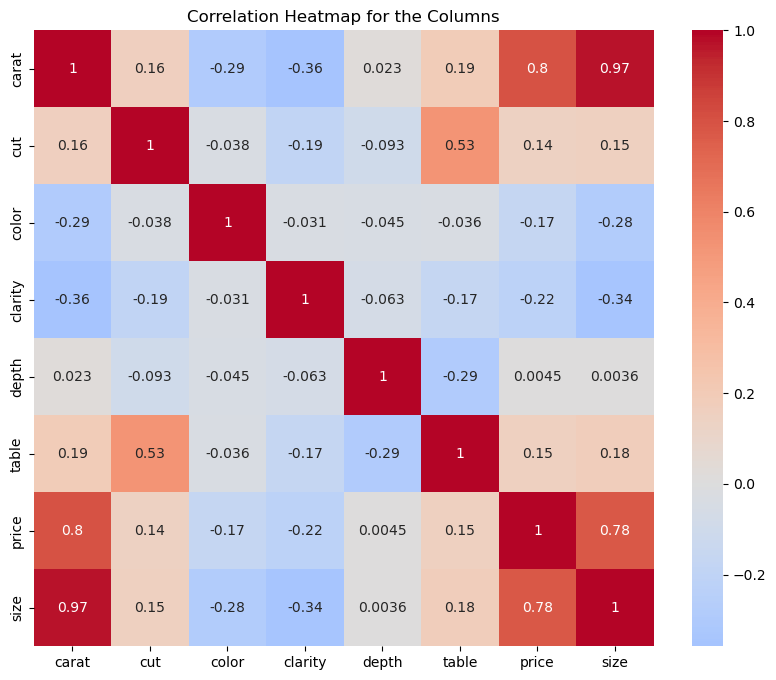

In [19]:
# Calculate correlation matrix for the specific columns
corr_matrix = df.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for the Columns')
plt.show()

****************
# Training The Modeul




In [20]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

train = LogisticRegression(max_iter=50, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Evaluate Model Performance
LR_accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",LR_accuracy)

The accuarcy is :  0.9630576208178439


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5333  186]
 [ 132 2957]]


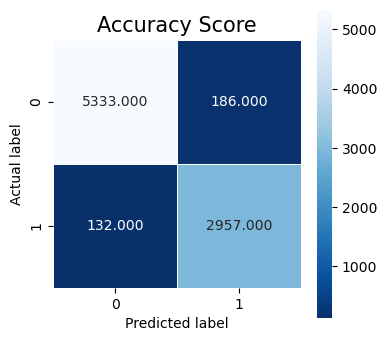

In [24]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [25]:
# Train with more iterations
train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9653810408921933


In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5354  165]
 [ 133 2956]]


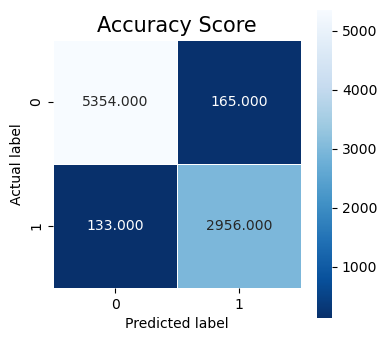

In [28]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

**************

In [29]:
df.to_csv('CleanData.csv')

In [30]:
dataset = pd.read_csv('CleanData.csv')

In [31]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,size
0,0,0.21,5,6,3,59.8,61.0,0,34.505856
1,1,0.29,5,2,4,62.4,58.0,0,46.724580
2,2,0.31,4,1,2,63.3,58.0,0,51.917250
3,3,0.24,3,1,6,62.8,57.0,0,38.693952
4,4,0.24,3,2,7,62.3,57.0,0,38.830870


In [32]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

# Algorithms Testing

******
## Logistic Regression

In [33]:
X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5353  166]
 [ 133 2956]]


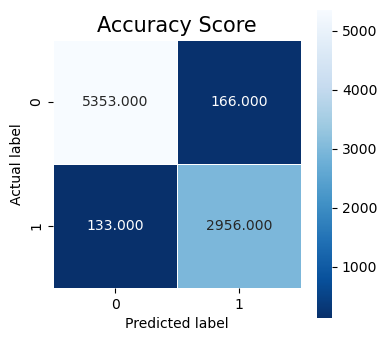

In [38]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [39]:
LR_accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",LR_accuracy)

The accuarcy is :  0.9652648698884758


# K-nn

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = classifier.predict(X_test)

C:\Users\osama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5267  210]
 [ 153 2978]]


In [44]:
KN_accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",KN_accuracy)

The accuarcy is :  0.9578299256505576


# SVC

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
SVC_accuracy = classifier.score(X_test, y_test)
print (SVC_accuracy)

0.9715381040892194


In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5343  134]
 [ 111 3020]]


# Tree

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Example classifier
# clf = RandomForestClassifier()

# Cross-validation (assuming X and y are your data and labels)
scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

Tree_accuracy = scores.mean()
print(Tree_accuracy)

0.966914498141264


In [51]:
print ('LR Accuracy =', LR_accuracy)
print ('KN Accuracy =', KN_accuracy)
print ('SVC Accuracy =', SVC_accuracy)
print ('Tree Accuracy =', Tree_accuracy)

LR Accuracy = 0.9652648698884758
KN Accuracy = 0.9578299256505576
SVC Accuracy = 0.9715381040892194
Tree Accuracy = 0.966914498141264


In [52]:
import joblib
model_filename = 'model_of _data.joblib'
joblib.dump(classifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model_of _data.joblib


In [58]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)
test = model_data.predict(X_test)
print(test)


[0 1 0 ... 1 0 0]
